## INF2031 - Algebra Linear - 2016.2
## Departamento de Informática - PUC-Rio 
## Prof. Hélio Lopes - lopes@inf.puc-rio.br
## http://www.inf.puc-rio.br/~lopes



## Minimos quadrados

1) Considerando o método de mínimos quadrados para determinarmos o polinômio de grau d que ajusta um conjunto de pontos {(x[i],y[i]), i = 0..(N-1)}, faça: 

1a) Escreva uma função buildLSmatrix que monta a matriz A de tamanho Nx(d+1) e cujos elementos A[i,j] são dados por A[i,j] = (x[i])**j. Essa função recebe como parâmetros: o vetor x e o grau d do polinomio de ajuste.

1b) Escreva uma segunda função que retorne os coeficientes do polinomio de grau d que melhor ajusta o conjunto de pontos. Essa função recebe como parâmetros: o vetor x, o vetor y e o grau do polinomio de ajuste, e retorna o vetor c
que é a solução da equação normal (At A c = At y), onde At é a matriz transposta de A.

1c) Faça uma função evalp que retorna o valor de polinomio de grau d com os coeficientes dados pelo vetor c no ponto x. Essa função retornará o seguinte valor:  c_0 + c_1 * x + ... + c[d] * x**d.

1d) Como você mediria o erro quadrático da __aproximação__ pelo método de mínimos quadrados?

1e) Considere que:
x = [1.0,2.0,3.0,4.0,5.0]
y = [3.0,6.0,2.0,10.0,2.0] 
Qual foi o erro quadrático da aproximação por um polinômio de grau 1 ? E para um de grau 2? E um de grau 3?


[[   1.    1.    1.    1.    1.]
 [   1.    2.    4.    8.   16.]
 [   1.    3.    9.   27.   81.]
 [   1.    4.   16.   64.  256.]
 [   1.    5.   25.  125.  625.]]
[ -73.          146.25        -91.04166667   22.75         -1.95833333]
1.00386202931e-21


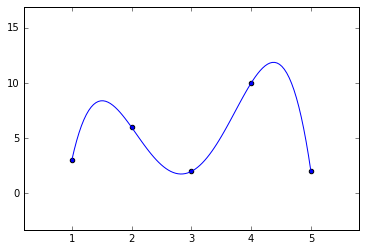

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def evalp(x,c):
    d = len(c)-1
    p = c[0]
    xp = 1.0
    for i in range(d):
        xp *= x
        p += c[i+1]*xp
    return p

def buildLSmatrix(x,d):
    A = np.zeros((len(x),d+1))
    for i in range(len(x)):
        for j in range(d+1):
            A[i,j] = x[i]**j
    return A

def LeastSquares(x,y,d):
    A = buildLSmatrix(x,d)
    AtA = np.transpose(A).dot(A)
    Aty = np.transpose(A).dot(y)
    c = np.linalg.solve(AtA,Aty)
    return c

def drawLSpolynomial(x,y,c,N,xmin,xmax):
    delta = (xmax-xmin)/(N-1.0)
    px = np.zeros(N)
    py = np.zeros(N)
    for i in range(N):
        xp = xmin + i*delta
        px[i] = xp
        py[i] = evalp(xp,c)
    plt.scatter(x,y)
    plt.plot(px,py)
    deltax = xmax - xmin
    plt.xlim(xmin-0.2*deltax, xmax+0.2*deltax)
    ymin = min([min(y),min(py)])
    ymax = max([max(y),max(py)])
    deltay = (ymax-ymin)
    plt.ylim(ymin-0.5*deltay,ymax+0.5*deltay)
    plt.show()

x = [1.0,2.0,3.0,4.0,5.0]
y = [3.0,6.0,2.0,10.0,2.0] 
d = 4

A = buildLSmatrix(x,d)
print(A)

c = LeastSquares(x,y,d)
print(c)

erro = np.linalg.norm(A.dot(c)-y)**2
print(erro)


drawLSpolynomial(x,y,c,100,min(x),max(x))

